<img src="https://1onjea25cyhx3uvxgs4vu325-wpengine.netdna-ssl.com/wp-content/themes/udacity_wp_1_8/images/Udacity_Logo_SVG_200x35.svg" style=" margin: 30px; height: 30px">



# Pneumonia Detection from Chest X-Rays

<img src="https://miro.medium.com/max/1400/1*rZ8wn3AO4CtzW_DGSQJjPg.png" style="height: 250px; width: 1000px">

### AI for Healthcare Nanodegree Program
**Project 1**

**Name**: Raghad Alharbi

**LinkedIn**: [Raghad-Alharbi](https://www.linkedin.com/in/raghad-alharbi/)

---
### Exploratory Data Analysis (EDA)

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
from glob import glob
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

##Import any other packages you may need here
from itertools import chain
from matplotlib.colors import ListedColormap

# Pallets used for visualizations
color= "Spectral"
color_plt = ListedColormap(sns.color_palette(color).as_hex())
color_hist = 'teal'
two_colors = [ sns.color_palette(color)[0], sns.color_palette(color)[5]]
three_colors = [ sns.color_palette(color)[5],sns.color_palette(color)[2], sns.color_palette(color)[0]]
BOLD = '\033[1m'
END = '\033[0m'

EDA is open-ended, and it is up to you to decide how to look at different ways to slice and dice your data. A good starting point is to look at the requirements for the FDA documentation in the final part of this project to guide (some) of the analyses you do. 

This EDA should also help to inform you of how pneumonia looks in the wild. E.g. what other types of diseases it's commonly found with, how often it is found, what ages it affects, etc. 

Note that this NIH dataset was not specifically acquired for pneumonia. So, while this is a representation of 'pneumonia in the wild,' the prevalence of pneumonia may be different if you were to take only chest x-rays that were acquired in an ER setting with suspicion of pneumonia. 

Perform the following EDA:
* The patient demographic data such as gender, age, patient position,etc. (as it is available)
* The x-ray views taken (i.e. view position)
* The number of cases including: 
    * number of pneumonia cases,
    * number of non-pneumonia cases
* The distribution of other diseases that are comorbid with pneumonia
* Number of disease per patient 
* Pixel-level assessments of the imaging data for healthy & disease states of interest (e.g. histograms of intensity values) and compare distributions across diseases.

Note: use full NIH data to perform the first a few EDA items and use `sample_labels.csv` for the pixel-level assassements. 

Also, **describe your findings and how will you set up the model training based on the findings.**

In [3]:
## Below is some helper code to read data for you.
## Load NIH data
df = pd.read_csv('/data/Data_Entry_2017.csv')
df.drop('Unnamed: 11', axis=1, inplace=True)
df.sample(3)

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y]
104137,00027809_006.png,No Finding,6,27809,41,F,AP,3056,2544,0.139,0.139
44062,00011357_001.png,No Finding,1,11357,30,F,AP,2500,2048,0.168,0.168
90152,00022416_023.png,Effusion,23,22416,51,M,AP,3056,2544,0.139,0.139


In [4]:
## Load 'sample_labels.csv' data for pixel level assessments
sample_df = pd.read_csv('sample_labels.csv')
sample_df.sample(3)

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImageWidth,OriginalImageHeight,OriginalImagePixelSpacing_x,OriginalImagePixelSpacing_y
747,00003917_000.png,No Finding,0,3917,063Y,F,PA,2048,2500,0.171,0.171
1042,00005448_008.png,Mass|Nodule|Pneumothorax,8,5448,060Y,M,PA,2500,2048,0.168,0.168
4872,00025624_002.png,Infiltration|Nodule,2,25624,022Y,M,AP,3056,2544,0.139,0.139


First, split up the 'Finding Labels' column into one additional column per disease (e.g. one for 'Cardiomegaly', one for 'Emphysema', etc.) and put a binary flag in that column to indicate the presence of the disease

In [5]:
all_labels = np.unique(list(chain(*df['Finding Labels'].map(lambda x: x.split('|')).tolist())))
all_labels = [x for x in all_labels if len(x)>0]
print('All Labels ({}): {}'.format(len(all_labels), all_labels))
for c_label in all_labels:
    if len(c_label)>1: # leave out empty labels
        df[c_label] = df['Finding Labels'].map(lambda finding: 1 if c_label in finding else 0)
df.sample(3)

All Labels (15): ['Atelectasis', 'Cardiomegaly', 'Consolidation', 'Edema', 'Effusion', 'Emphysema', 'Fibrosis', 'Hernia', 'Infiltration', 'Mass', 'No Finding', 'Nodule', 'Pleural_Thickening', 'Pneumonia', 'Pneumothorax']


,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,...,Emphysema,Fibrosis,Hernia,Infiltration,Mass,No Finding,Nodule,Pleural_Thickening,Pneumonia,Pneumothorax
28810,00007526_003.png,No Finding,3,7526,61,M,PA,2048,2500,0.168,...,0,0,0,0,0,1,0,0,0,0
101821,00027073_000.png,No Finding,0,27073,7,F,PA,2378,2153,0.143,...,0,0,0,0,0,1,0,0,0,0
64461,00015911_006.png,Infiltration,6,15911,61,M,AP,2500,2048,0.168,...,0,0,0,1,0,0,0,0,0,0


### Statistics about the Findings

In [5]:
df[all_labels].astype('category').describe().T

,count,unique,top,freq
Atelectasis,112120,2,0,100561
Cardiomegaly,112120,2,0,109344
Consolidation,112120,2,0,107453
Edema,112120,2,0,109817
Effusion,112120,2,0,98803
Emphysema,112120,2,0,109604
Fibrosis,112120,2,0,110434
Hernia,112120,2,0,111893
Infiltration,112120,2,0,92226
Mass,112120,2,0,106338


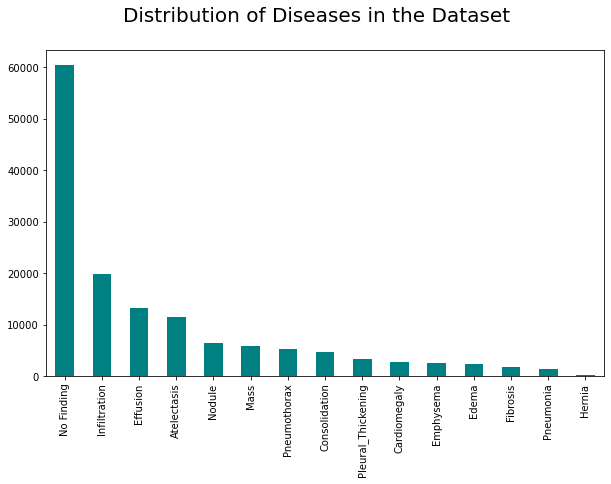

In [9]:
plt.figure(figsize=(10, 6))
plt.suptitle('Distribution of Diseases in the Dataset', fontsize = 20)
df[all_labels].sum().sort_values(ascending = False).plot(kind='bar', color= color_hist)
plt.show();

From the distribution of diseases visualization above, we can see that most of the X-rays had no findings, then the next three most common diagnosis were Infiltration, Effusion, and Atelectasis. Also, we can see that Pneumonia was the second least common diagnosis in our dataset

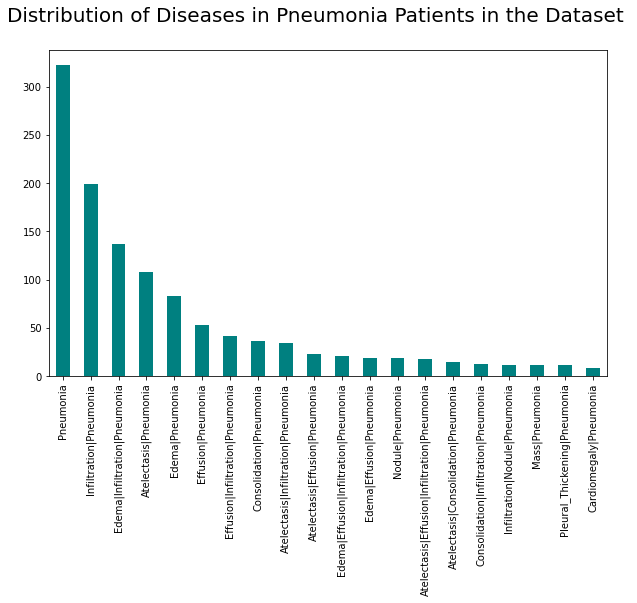

In [20]:
plt.figure(figsize=(10, 6))
plt.suptitle('Distribution of Diseases in Pneumonia Patients in the Dataset ', fontsize = 20)
df[df['Pneumonia']==1]['Finding Labels'].value_counts()[0:20].plot(kind='bar',color=color_hist)
plt.show();

From the visualization above, we can see the distribution of diseases in Pneumonia patients, and most patients had only Pneumonia with no comorbidities that can be shown in the chest x-ray. The three most common comorbidities that occurred with Pneumonia in our dataset are Infiltration, Infiltration and Edema together with Pneumonia or Atelectisis and Pneumonia. The lease common comorbidity that occurred with Pneumonia in the dataset is Cardiomegaly.

 Number of Pneumonia cases:  1430
 Number of None Pneumonia cases:  110674
 The Distribution of Pneumonia in all Patients: 
0    0.987244
1    0.012756
Name: Pneumonia, dtype: float64


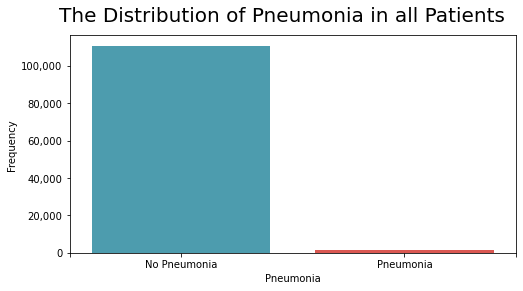

In [189]:
fig, ax = plt.subplots( figsize=(8, 4))
sns.countplot(x='Pneumonia',orient='h', data= df, palette = two_colors, saturation=0.90)

ax.set_xlabel('Pneumonia')
ax.set_ylabel('Frequency')
plt.xticks([-0.5, 0, 1, 1.5], ['','No Pneumonia', 'Pneumonia',''])
fig.suptitle('The Distribution of Pneumonia in all Patients ', fontsize = 20)

ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
print(BOLD,'Number of Pneumonia cases:',END, df[df['Pneumonia']==1]['Pneumonia'].value_counts()[1])
print(BOLD,'Number of None Pneumonia cases:',END, df[df['Pneumonia']==0]['Pneumonia'].value_counts()[0])

print(BOLD,'The Distribution of Pneumonia in all Patients:',END)
print(df['Pneumonia'].value_counts()/len(df))

plt.show();

From the visualization above, we can see that the distribution of pneumonia in all patients in the dataset is highly imbalanced with only 1.27% of the patients has pneumonia and 98.7% of them have no pneumonia. In the modeling part, we are going to rebalance the training and validation datasets to allow the model to learn more from the train test, and to get accurate metrics from the validation set.

### Description of the Demographics
- ### Patient Age

In [11]:
print('Minimum age = ',df['Patient Age'].min())
print('Maximum age = ',df['Patient Age'].max())
print('Number of patients with age more than 100 =',df['Patient Age'][df['Patient Age']>100].value_counts().sum())

Minimum age =  1
Maximum age =  414
Number of patients with age more than 100 = 16


In [21]:
# removing outliers in age
df = df [df['Patient Age']<100]
print('After removing outliers:')
print('Minimum age = ',df['Patient Age'].min())
print('Maximum age = ',df['Patient Age'].max())

After removing outliers:
Minimum age =  1
Maximum age =  95


There was 16 outliers in the age column, as they were more than 100 year old and the maximum age was 414, which is not possible. I think they are mistakes in the data entry process, and we cannot really know the real ages now. Therefore, I decided to remove the outliers from the dataset, so the 16 images will not be included in the modeling part. After removing the outliers, we can see that the maximum age in the dataset is 95 year old, which is reasonable. 

                count       mean        std  min   25%   50%   75%   max
Patient Age  112104.0  46.872574  16.598152  1.0  35.0  49.0  59.0  95.0


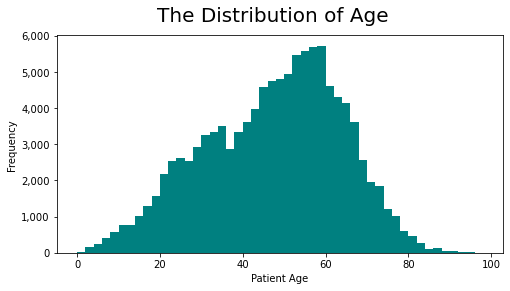

In [100]:
fig, ax = plt.subplots( figsize=(8, 4))
ax.hist(df['Patient Age'], bins=np.arange(0,100,2), color=color_hist)

ax.set_xlabel('Patient Age in years')
ax.set_ylabel('Frequency')
fig.suptitle('The Distribution of Age', fontsize = 20)

ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
print(df[['Patient Age']].describe().T)
plt.show();

From the visualization above, we can see the distribution of age in all patients in the dataset. It is left skewed with a mean value of 46.8 and a median value of 49.Also, from the distrbution, we can see that very few patients are more than 80 year old.

In [118]:
print(BOLD,'Age Statistics for patients without Pneumonia: ', END)
print(df[df['Pneumonia']==0][['Patient Age']].describe().T);print();
print(BOLD,'Age Statistics for patients with Pneumonia: ', END)
print(df[df['Pneumonia']==1][['Patient Age']].describe().T)

 Age Statistics for patients without Pneumonia:  
                count       mean        std  min   25%   50%   75%   max
Patient Age  110674.0  46.901025  16.582446  1.0  35.0  49.0  59.0  95.0

 Age Statistics for patients with Pneumonia:  
              count       mean        std  min   25%   50%   75%   max
Patient Age  1430.0  44.670629  17.639098  2.0  31.0  46.0  59.0  90.0


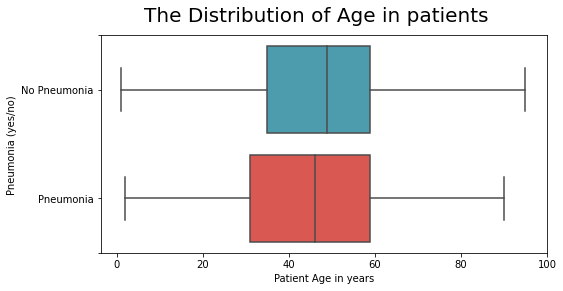

In [177]:
fig, ax = plt.subplots( figsize=(8, 4))
sns.boxplot(x='Patient Age', y='Pneumonia',orient='h', data= df, palette = two_colors, saturation=0.90)

ax.set_xlabel('Patient Age in years')
plt.yticks([-0.5, 0, 1, 1.5], ['','No Pneumonia', 'Pneumonia',''])
plt.xticks(np.arange(0,120,20))
ax.set_ylabel('Pneumonia (yes/no)')
fig.suptitle('The Distribution of Age in patients', fontsize = 20)

plt.show();

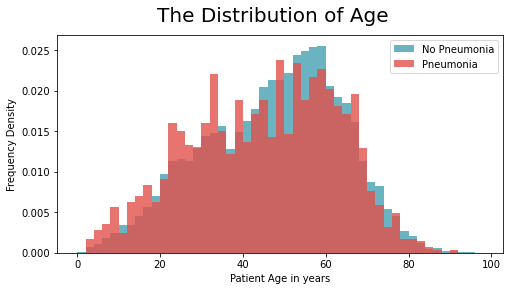

In [13]:
fig, ax = plt.subplots( figsize=(8, 4))
ax.hist(df[df['Pneumonia']==0]['Patient Age'], bins=np.arange(0,100,2), alpha=0.8, color=sns.color_palette(color)[5], density= True, label = 'No Pneumonia')
ax.hist(df[df['Pneumonia']==1]['Patient Age'], bins=np.arange(0,100,2), alpha=0.8, color=sns.color_palette(color)[0], density= True, label = 'Pneumonia')

ax.set_xlabel('Patient Age in years')
ax.set_ylabel('Frequency Density')
plt.legend(loc='best')
fig.suptitle('The Distribution of Age', fontsize = 20)

plt.show();

From the visualizations and output above, we can see the difference between the ages of Pneumonia and non-Pneumonia patients in the dataset. Their distributions are both left skewed, but their means and medians are slightly different. Pneumonia patients in the dataset have a mean age of 44.6 and median age of 46 and non-Pneumonia patients have a mean age of 46.9 and a median of 46. There is about two years difference between their means and medians, as Pneumonia patients in the dataset tend to be younger than non-Pneumonia patients. I am not sure if this is a good representation of the real world, as I thought Pneumonia patients should be older in general.

- ### Patient Gender

The Distribution of Gender in all Patients: 
M    0.564904
F    0.435096
Name: Patient Gender, dtype: float64


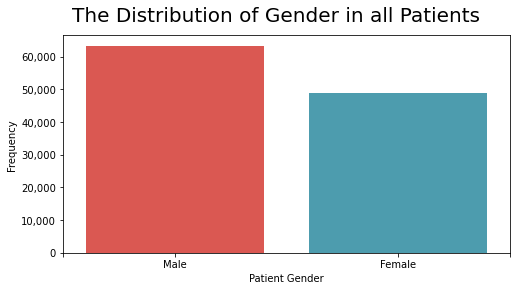

In [16]:
fig, ax = plt.subplots( figsize=(8, 4))
sns.countplot(x='Patient Gender',orient='h', data= df, palette = two_colors, saturation=0.90)

ax.set_xlabel('Patient Gender')
ax.set_ylabel('Frequency')
plt.xticks([-0.5, 0, 1, 1.5], ['','Male', 'Female',''])
fig.suptitle('The Distribution of Gender in all Patients ', fontsize = 20)

ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

print(BOLD+'The Distribution of Gender in all Patients:',END)
print(df['Patient Gender'].value_counts()/len(df))

plt.show();

From the visualization above, we can see that the number of males in the dataset is more than females, as males represent 56.4% of the pateints in the dataset, where females are only 43.5% of the dataset. This is not a good representation of the real world, as the ratio should be 1:1. 

The Distribution of Gender in Patients with Pneumonia: 
M    0.585315
F    0.414685
Name: Patient Gender, dtype: float64


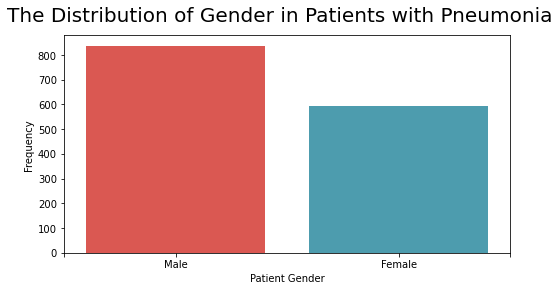

In [15]:
fig, ax = plt.subplots( figsize=(8, 4))
sns.countplot(x='Patient Gender',orient='h', data= df[df['Pneumonia']==1], palette = two_colors, saturation=0.90)

ax.set_xlabel('Patient Gender')
ax.set_ylabel('Frequency')
plt.xticks([-0.5, 0, 1, 1.5], ['','Male', 'Female',''])
fig.suptitle('The Distribution of Gender in Patients with Pneumonia', fontsize = 20)
print(BOLD+'The Distribution of Gender in Patients with Pneumonia:',END)
print(df[df['Pneumonia']==1]['Patient Gender'].value_counts()/len(df[df['Pneumonia']==1]))

plt.show();

Because of the imbalanced distribution of geneder in the full dataset, we can see that the distribution of gender in pneumonia patients is also imbalanced with 58.5% males and 41.4 females.

In [14]:
print(BOLD+'prevalence of pneumonia in women:',END)
print(df[df['Patient Gender']=='F']['Pneumonia'].value_counts()/len(df[df['Patient Gender']=='F']))
print(BOLD+ 'prevalence of pneumonia in men: ', END)
print(df[df['Patient Gender']=='M']['Pneumonia'].value_counts()/len(df[df['Patient Gender']=='M']))

prevalence of pneumonia in women: 
0    0.987842
1    0.012158
Name: Pneumonia, dtype: float64
prevalence of pneumonia in men:  
0    0.986783
1    0.013217
Name: Pneumonia, dtype: float64


- ### View Position

The Distribution of View Position in all Patients: 
PA    0.600326
AP    0.399674
Name: View Position, dtype: float64


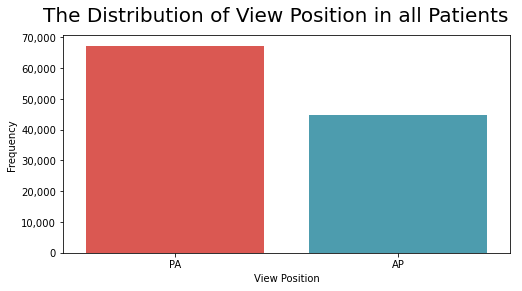

In [17]:
fig, ax = plt.subplots( figsize=(8, 4))
sns.countplot(x='View Position',orient='h', data= df, palette = two_colors, saturation=0.90)

ax.set_xlabel('View Position')
ax.set_ylabel('Frequency')
#plt.xticks([-0.5, 0, 1, 1.5], ['','', '',''])
fig.suptitle('The Distribution of View Position in all Patients ', fontsize = 20)

ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

print(BOLD+'The Distribution of View Position in all Patients:',END)
print(df['View Position'].value_counts()/len(df))

plt.show();

The Distribution of View Position in Patients with Pneumonia: 
AP    0.559441
PA    0.440559
Name: View Position, dtype: float64


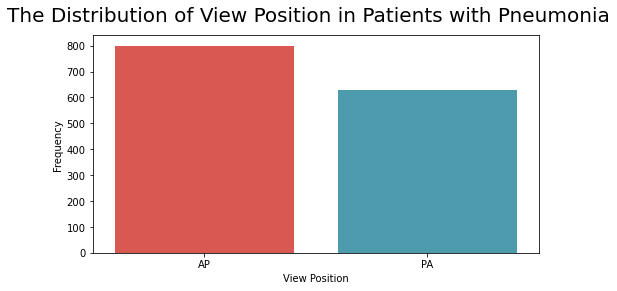

In [18]:
fig, ax = plt.subplots( figsize=(8, 4))
sns.countplot(x='View Position',orient='h', data= df[df['Pneumonia']==1], palette = two_colors, saturation=0.90)

ax.set_xlabel('View Position')
ax.set_ylabel('Frequency')
fig.suptitle('The Distribution of View Position in Patients with Pneumonia', fontsize = 20)
print(BOLD+'The Distribution of View Position in Patients with Pneumonia:',END)
print(df[df['Pneumonia']==1]['View Position'].value_counts()/len(df[df['Pneumonia']==1]))

plt.show();

From the visualization above, there are two different view position which are 'PA' and 'AP', and 60% of the view positions are 'AP' and the rest are 'PA'.

- ### Number of disease per patient

In [197]:
df['No_of_diseases'] =  np.where(df['No Finding']==1, 0, df[all_labels].sum(axis = 1))

In [198]:
df.head()

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,...,Fibrosis,Hernia,Infiltration,Mass,No Finding,Nodule,Pleural_Thickening,Pneumonia,Pneumothorax,No_of_diseases
0,00000001_000.png,Cardiomegaly,0,1,58,M,PA,2682,2749,0.143,...,0,0,0,0,0,0,0,0,0,1
1,00000001_001.png,Cardiomegaly|Emphysema,1,1,58,M,PA,2894,2729,0.143,...,0,0,0,0,0,0,0,0,0,2
2,00000001_002.png,Cardiomegaly|Effusion,2,1,58,M,PA,2500,2048,0.168,...,0,0,0,0,0,0,0,0,0,2
3,00000002_000.png,No Finding,0,2,81,M,PA,2500,2048,0.171,...,0,0,0,0,1,0,0,0,0,0
4,00000003_000.png,Hernia,0,3,81,F,PA,2582,2991,0.143,...,0,1,0,0,0,0,0,0,0,1


In [199]:
df['No_of_diseases'].max()

9

 The Distribution of Number of Diseases in all Patients: 
0    0.538366
1    0.276163
2    0.127578
3    0.043317
4    0.011124
5    0.002685
6    0.000598
7    0.000143
9    0.000018
8    0.000009
Name: No_of_diseases, dtype: float64


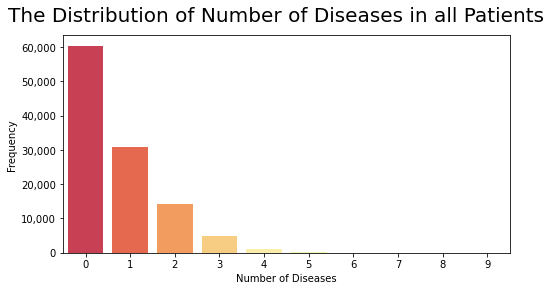

In [203]:
fig, ax = plt.subplots( figsize=(8, 4))
sns.countplot(x='No_of_diseases',orient='h', data= df, palette = color, saturation=0.90)

ax.set_xlabel('Number of Diseases')
ax.set_ylabel('Frequency')
fig.suptitle('The Distribution of Number of Diseases in all Patients ', fontsize = 20)

ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

print(BOLD,'The Distribution of Number of Diseases in all Patients:',END)
print(df['No_of_diseases'].value_counts()/len(df))

plt.show();

From the visualization above, we can see that most patients in the dataset have no diseases showen in the x-ray. 27% of the patients have one disease, and  12% have two diseases. the rest of the patients have 3 or more diseases. The maximum number of diseases a patient has in this dataset is 8 diseases.

 The Distribution of Number of Diseases in Patients with Pneumonia: 
2    0.004844
3    0.003443
1    0.002872
4    0.001231
5    0.000303
7    0.000027
6    0.000027
9    0.000009
Name: No_of_diseases, dtype: float64


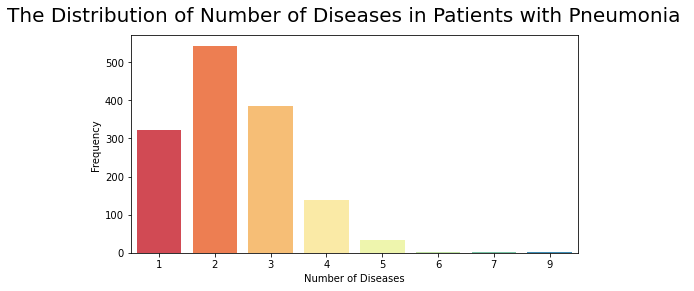

In [206]:
fig, ax = plt.subplots( figsize=(8, 4))
sns.countplot(x='No_of_diseases',orient='h', data= df[df['Pneumonia']==1], palette = color, saturation=0.90)

ax.set_xlabel('Number of Diseases')
ax.set_ylabel('Frequency')
fig.suptitle('The Distribution of Number of Diseases in Patients with Pneumonia ', fontsize = 20)

ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

print(BOLD,'The Distribution of Number of Diseases in Patients with Pneumonia:',END)
print(df[df['Pneumonia']==1]['No_of_diseases'].value_counts()/len(df))

plt.show();

From the visualization above, we can see the number of diseases Pneumonia patients have in the dataset. The distribution is right skewed with a median of 2 diseases.

 The Distribution of Number of Diseases in Patients with No Pneumonia: 
0    0.538366
1    0.273291
2    0.122734
3    0.039874
4    0.009893
5    0.002382
6    0.000571
7    0.000116
9    0.000009
8    0.000009
Name: No_of_diseases, dtype: float64


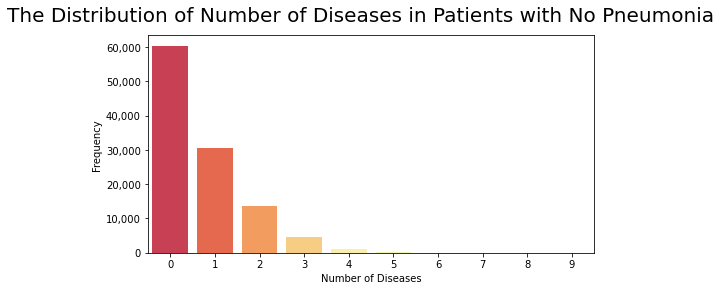

In [207]:
fig, ax = plt.subplots( figsize=(8, 4))
sns.countplot(x='No_of_diseases',orient='h', data= df[df['Pneumonia']==0], palette = color, saturation=0.90)

ax.set_xlabel('Number of Diseases')
ax.set_ylabel('Frequency')
fig.suptitle('The Distribution of Number of Diseases in Patients with No Pneumonia ', fontsize = 20)

ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

print(BOLD,'The Distribution of Number of Diseases in Patients with No Pneumonia:',END)
print(df[df['Pneumonia']==0]['No_of_diseases'].value_counts()/len(df))

plt.show();

From the visualization above, we can see that most non-pneumonia patients have no diseases in their x-ray

### Getting paths to images

In [7]:
all_image_paths = {os.path.basename(x): x for x in 
                   glob(os.path.join('/data','images*', '*', '*.png'))}
print('Scans found:', len(all_image_paths), ', Total Headers', df.shape[0])
df['path'] = df['Image Index'].map(all_image_paths.get)
sample_df['path'] =  sample_df['Image Index'].map(all_image_paths.get)

Scans found: 112120 , Total Headers 112120


### Pixel-level assessments of the imaging data for healthy patients

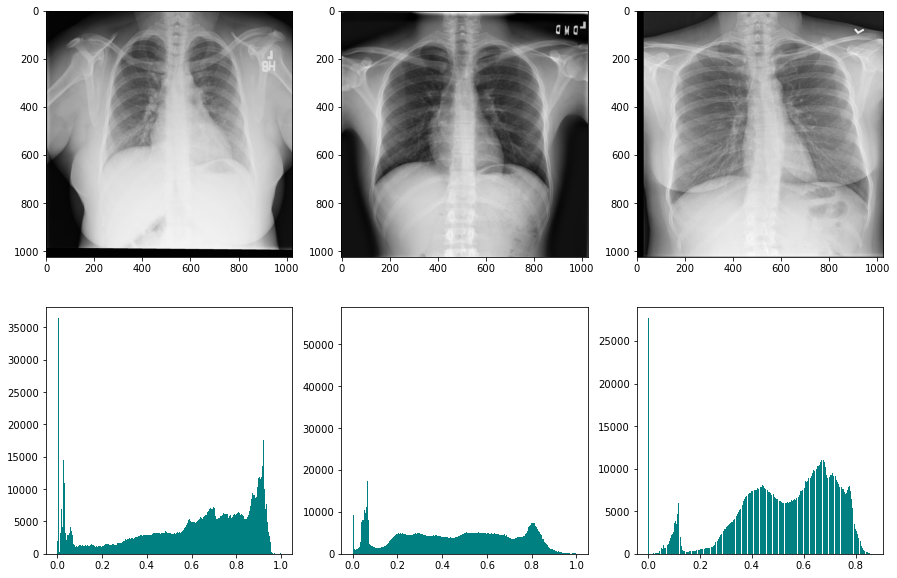

In [10]:
f, ax = plt.subplots(2, 3, figsize=(15, 10))
healthy = sample_df[sample_df['Finding Labels']=='No Finding']['path'].sample(3).to_list()

for i in range(len(healthy)):
    image =plt.imread(healthy[i])
    ax[0][i].imshow(image,cmap='gray') 
    ax[1][i].hist(image.ravel(), bins=256,color=color_hist)

From the visualizations above, we can check the intensity distributions of x-rays of healthy patients after normalization .The peak occurs in the high end of 0.7 to 0.9.General shape of the distributions is left skewed
Random spikes in the distributions occurs in the 0 intensity, as this is the intensity of the background. The distributions is continuous in two graphs and not continuous in one.

### Pixel-level assessments of the imaging data for patients with only Pneumonia

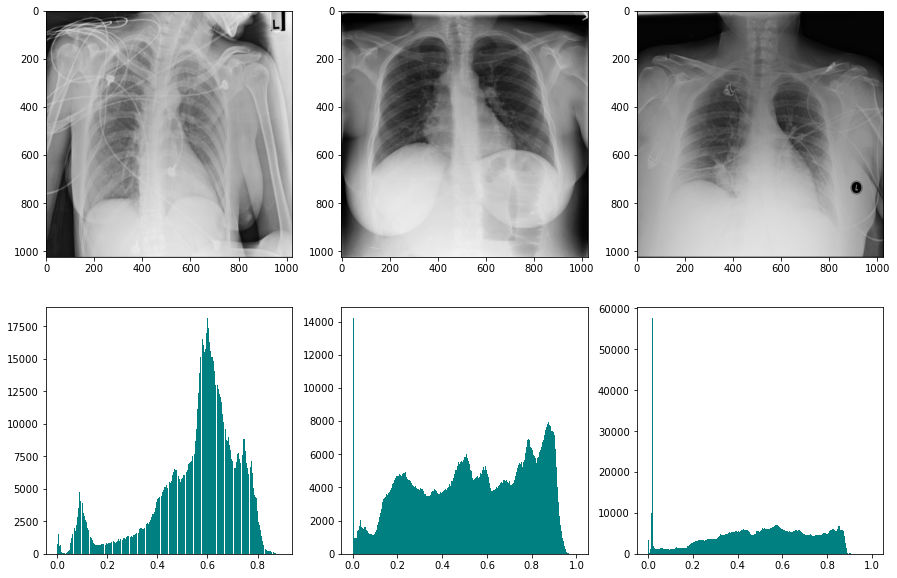

In [9]:
f, ax = plt.subplots(2, 3, figsize=(15, 10))
Only_Pneumonia = sample_df[sample_df['Finding Labels']=="Pneumonia"]['path'].sample(3).to_list()

for i in range(len(Only_Pneumonia)):
    image =plt.imread(Only_Pneumonia[i])
    ax[0][i].imshow(image,cmap='gray') 
    ax[1][i].hist(image.ravel(), bins=256,color=color_hist)

From the visualizations above, we can check the intensity distributions of x-rays of Pneumonia patients after normalization .In one graph, the peak occurs in around 0.6, but the rest don't have peaks. General shape of the distributions is left skewed, and a bit flat in two of the graphs.
Random spikes in the distributions occurs in the 0 intensity, as this is the intensity of the background. The distributions is continuous in two graphs and not continuous in one.
The distributions of Pneumonia and non-Pneumoniaintensities are similar.

### Pixel-level assessments of the imaging data for patients with Pneumonia and Infiltration

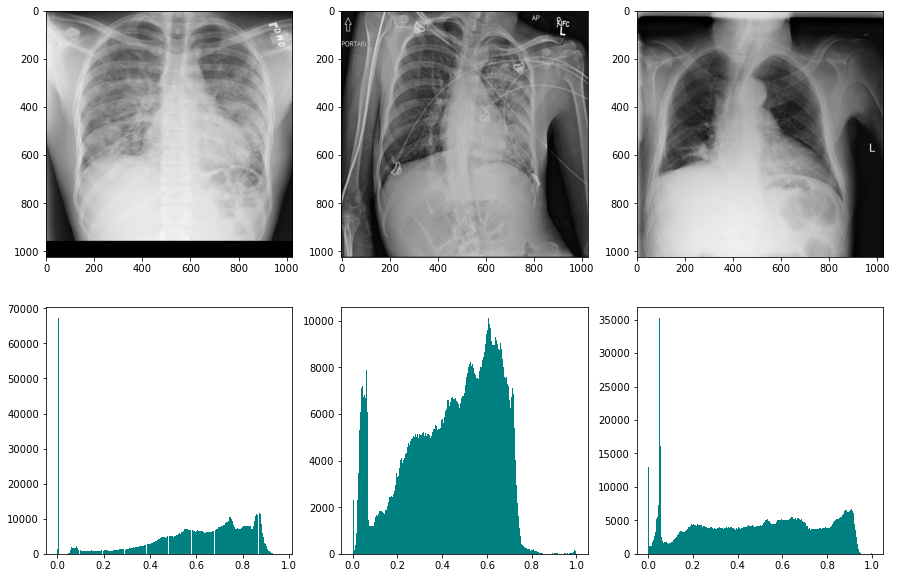

In [261]:
f, ax = plt.subplots(2, 3, figsize=(15, 10))
Pneumonia_Infiltration = sample_df[sample_df['Finding Labels']=="Infiltration|Pneumonia"]['path'].sample(3).to_list()

for i in range(len(Pneumonia_Infiltration)):
    image =plt.imread(Pneumonia_Infiltration[i])
    ax[0][i].imshow(image,cmap='gray') 
    ax[1][i].hist(image.ravel(), bins=256,color=color_hist)

### Pixel-level assessments of the imaging data for patients with Pneumonia,  Infiltration, and Edema

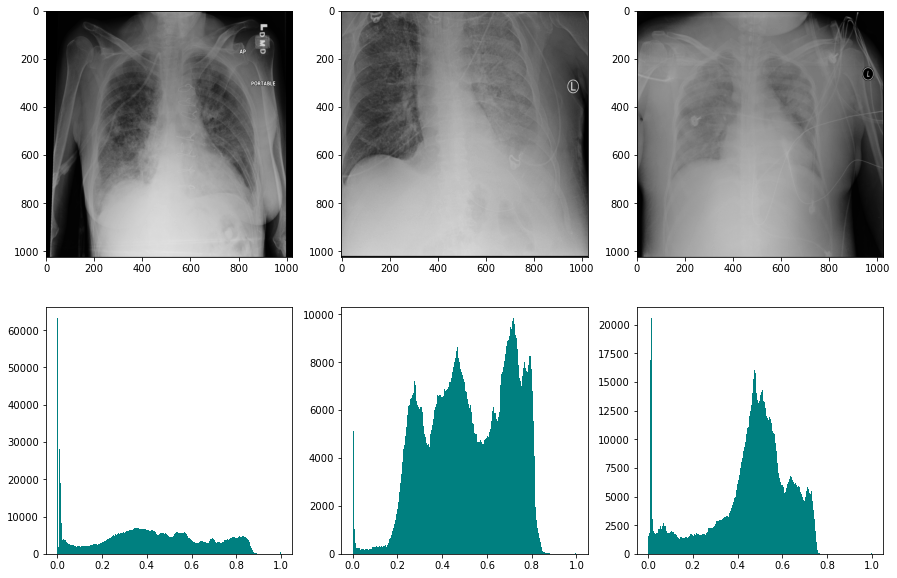

In [263]:
f, ax = plt.subplots(2, 3, figsize=(15, 10))
Pneumonia_Infiltration_Edema = sample_df[sample_df['Finding Labels']=="Edema|Infiltration|Pneumonia"]['path'].sample(3).to_list()

for i in range(len(Pneumonia_Infiltration_Edema)):
    image =plt.imread(Pneumonia_Infiltration_Edema[i])
    ax[0][i].imshow(image,cmap='gray') 
    ax[1][i].hist(image.ravel(), bins=256,color=color_hist)

### Pixel-level assessments of the imaging data for patients with Pneumonia, and Atelectasis

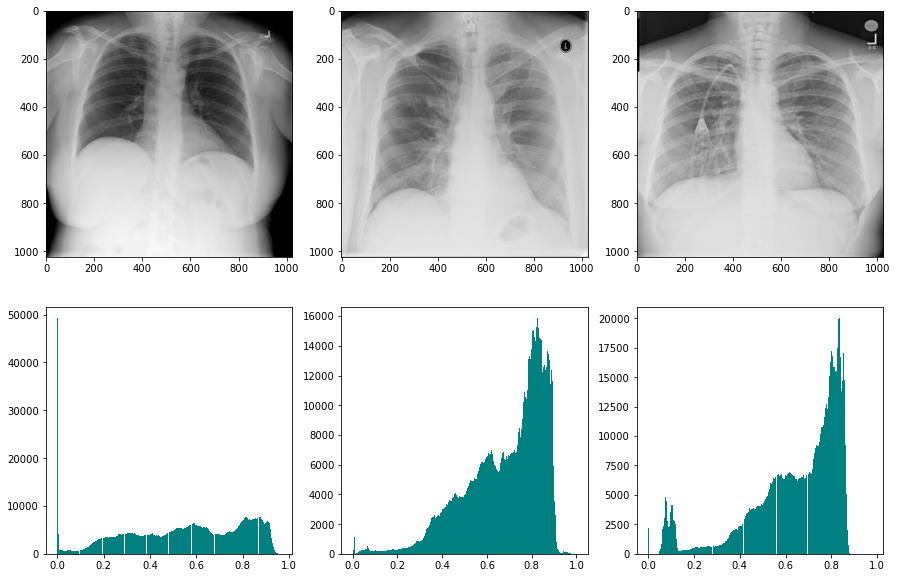

In [264]:
f, ax = plt.subplots(2, 3, figsize=(15, 10))
Pneumonia_Atelectasis = sample_df[sample_df['Finding Labels']=="Atelectasis|Pneumonia"]['path'].sample(3).to_list()

for i in range(len(Pneumonia_Atelectasis)):
    image =plt.imread(Pneumonia_Atelectasis[i])
    ax[0][i].imshow(image,cmap='gray') 
    ax[1][i].hist(image.ravel(), bins=256,color=color_hist)

### Pixel-level assessments of the imaging data for patients with Pneumonia, and Edema

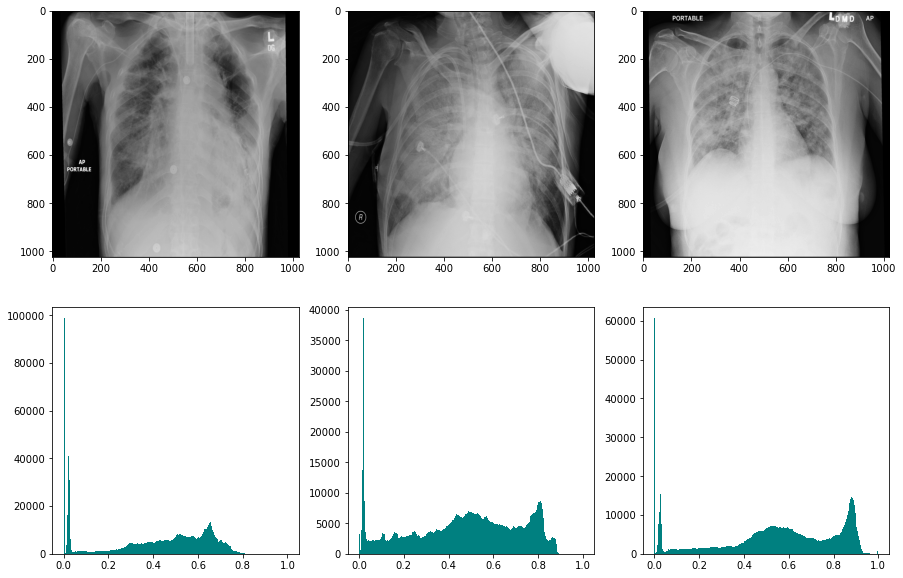

In [265]:
f, ax = plt.subplots(2, 3, figsize=(15, 10))
Pneumonia_Edema = sample_df[sample_df['Finding Labels']=="Edema|Pneumonia"]['path'].sample(3).to_list()

for i in range(len(Pneumonia_Edema)):
    image =plt.imread(Pneumonia_Edema[i])
    ax[0][i].imshow(image,cmap='gray') 
    ax[1][i].hist(image.ravel(), bins=256,color=color_hist)

Most intensity distributions of x-rays of all images are very similar to the un trained eyes. 